# Boston House Price Prediction - Efficient Implementation

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Set visualization style
sns.set_style("whitegrid")

In [2]:
# Load data from CSV file
data = pd.read_csv('BostonHousing.csv')
print(f"Loaded dataset with {data.shape[0]} samples and {data.shape[1]} features")
data.head()

Loaded dataset with 506 samples and 14 features


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Quick data analysis
print("Dataset Info:")
data.info()

# Check for missing values
missing = data.isnull().sum()
if missing.sum() > 0:
    print("\nMissing values:\n", missing[missing > 0])
else:
    print("\nNo missing values found")
    
# Statistical summary of target variable
print("\nPrice Statistics:")
print(data['price'].describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

No missing values found

Price Statistics:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtyp

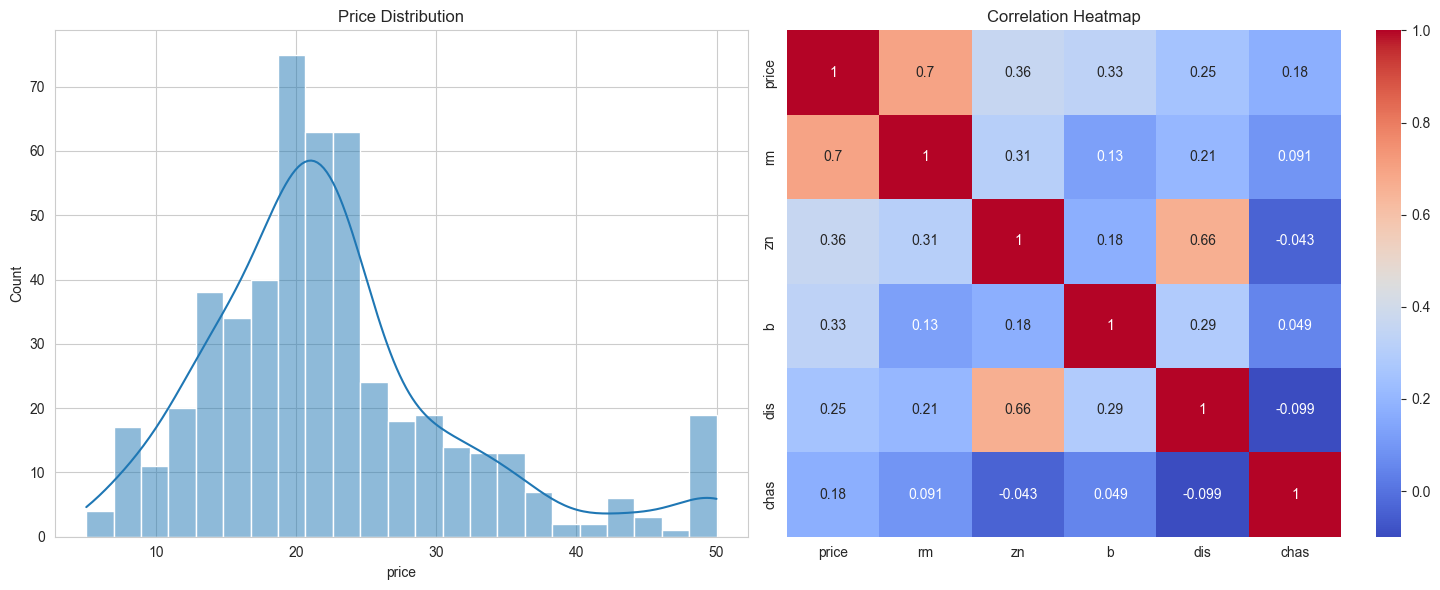

Top correlations with price:
price    1.000000
rm       0.695360
zn       0.360445
b        0.333461
dis      0.249929
chas     0.175260
Name: price, dtype: float64


In [4]:
# Key visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Price distribution
sns.histplot(data['price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')

# Correlation heatmap of the most correlated features
corr = data.corr()
most_corr = corr['price'].sort_values(ascending=False)
top_features = ['price'] + list(most_corr[1:6].index)
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

print("Top correlations with price:")
print(most_corr.head(6))

Model Performance:
R² Score: 0.6688
RMSE: 4.9286


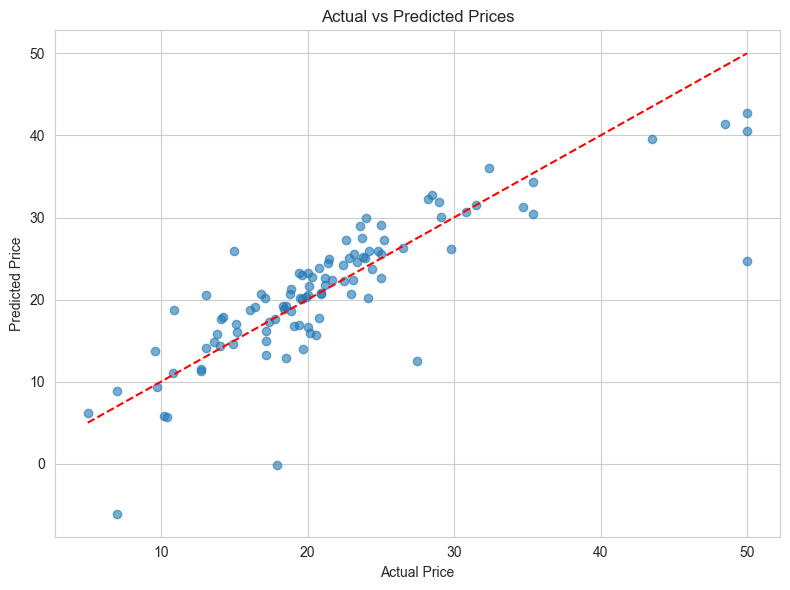

In [5]:
# Model training and evaluation
# Prepare data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

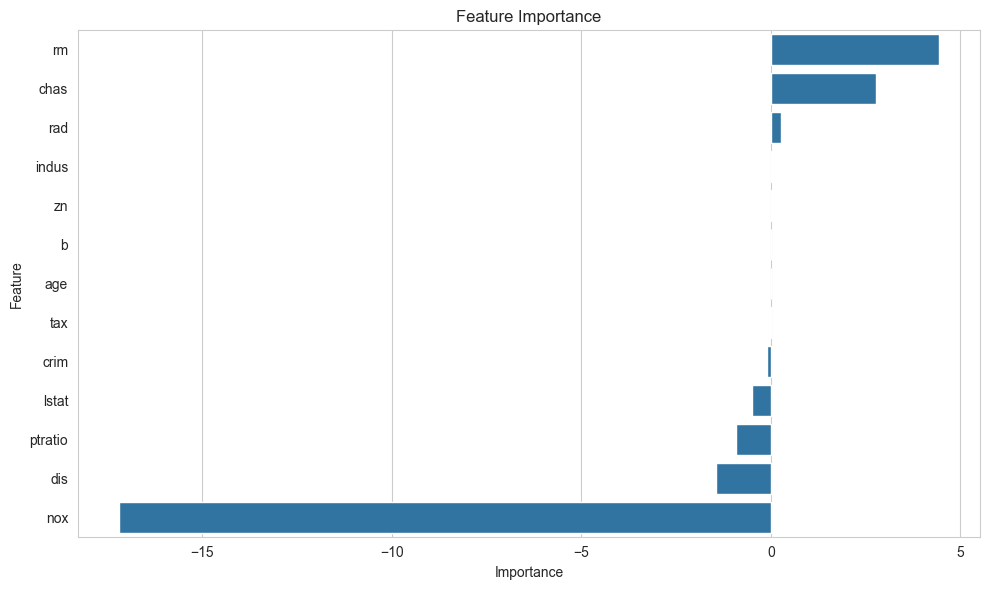

Top 5 most important features:
  Feature  Importance
5      rm    4.438835
3    chas    2.784438
8     rad    0.262430
2   indus    0.040381
1      zn    0.030110


In [6]:
# Feature importance
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=coefs)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 5 most important features:")
print(coefs.head(5))

In [7]:
# Save the model
with open('boston_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'boston_model.pkl'")

Model saved as 'boston_model.pkl'
